# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [4]:
# Let's visualize it!
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


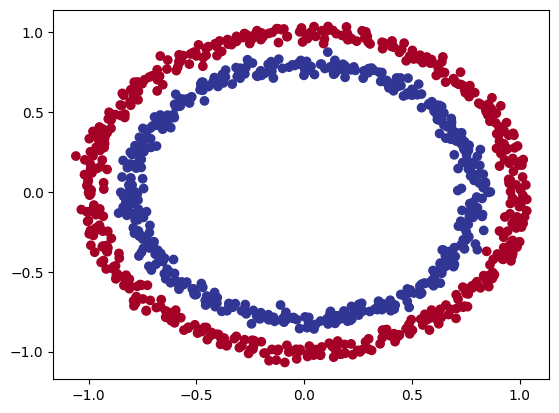

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak...

In [8]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 2ms/step - loss: 3.9666 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 1.9800 - accuracy: 0.4860
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7230 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4890


In [9]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we are working on a binary classification problem and our model is getting around 50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=10, verbose=0)

In [11]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5800


[0.6933207511901855, 0.5799999833106995]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within the layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.3891 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7213 - accuracy: 0.4900
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.4570
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5100
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5250
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.4930
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4880
Epoch 11/

In [13]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5090


[0.6997495889663696, 0.5090000033378601]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this functions will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions accros the meshgrids
* Plot the predictions as well as a line between zones (where each unique class falls)

In [14]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values (we are going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We habe to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


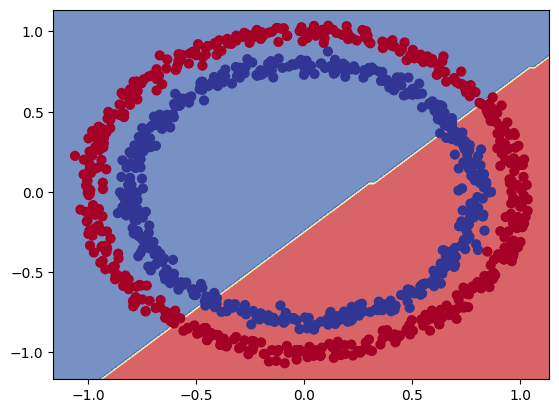

In [15]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [17]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create somre regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Oh wait... we comipled our model for a binary classification problem.

But... er are now working on a regression problem, let's change the model to suit our data.

In [18]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 7ms/step - loss: 153.8185 - mae: 153.8185
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 58.4155 - mae: 58.4155
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 71.7146 - mae: 71.7146
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 49.3985 - mae: 49.3985
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 49.4808 - mae: 49.4808
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 42.5122 - mae: 42.5122
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 43.7988 - mae: 43.7988
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.1031 - mae: 42.1031
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 42.0098 - mae: 42.0098
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 41.5973 - mae: 41.5973
Epoch 11/100
5/5 [==============================] - 0s 3m

2/2 [==============================] - 0s 3ms/step


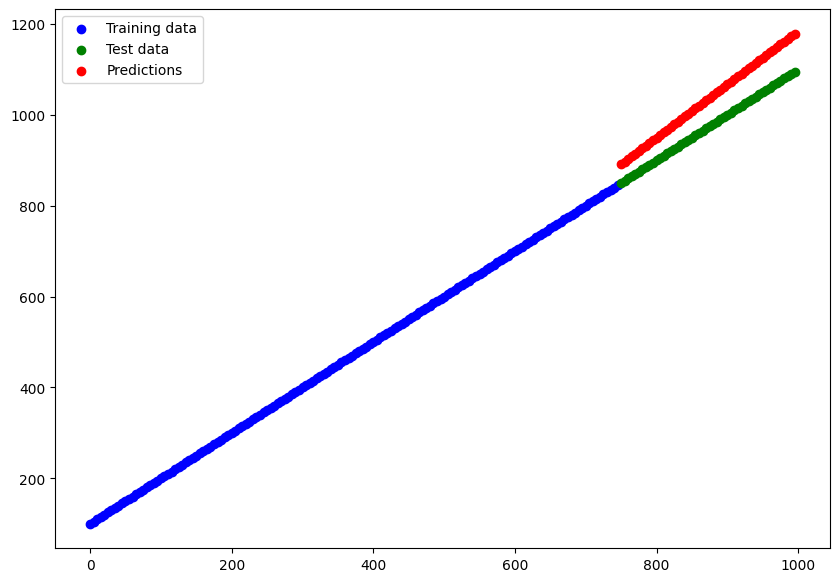

In [19]:
# Make predictinos with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()
plt.show()

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100


c:\Users\Usuario\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 0s 3ms/step - loss: 4.3175 - accuracy: 0.4290
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2950 - accuracy: 0.4280
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2908 - accuracy: 0.4280
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2900 - accuracy: 0.4280
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2892 - accuracy: 0.4280
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2883 - accuracy: 0.4270
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2875 - accuracy: 0.4270
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2866 - accuracy: 0.4260
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2857 - accuracy: 0.4250
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2848 - accuracy: 0.4240
Epoch 11/100
32/32 [=

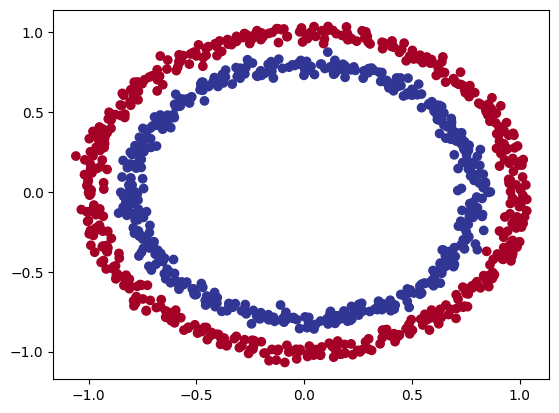

In [21]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


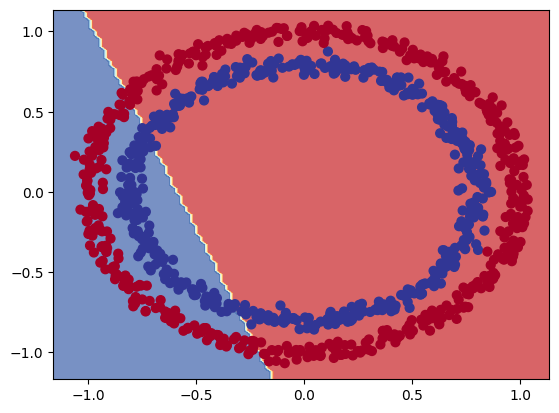

In [22]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4,
                       X, y)

Let's try build our first neural network with a non-linear activation function.

In [23]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100


c:\Users\Usuario\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 0s 4ms/step - loss: 5.8827 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8623 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8589 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8497 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8353 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8211 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8082 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7839 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 5.7674 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7650 - accuracy: 0.4850
Epoch 11/100
32/32 [=

In [29]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 4ms/step - loss: 1.3844 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.9849 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.9067 - accuracy: 0.4720
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8637 - accuracy: 0.3740
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8353 - accuracy: 0.3550
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8135 - accuracy: 0.3490
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7966 - accuracy: 0.3610
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7820 - accuracy: 0.3500
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7703 - accuracy: 0.3180
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7598 - accuracy: 0.3160
Epoch 11/

In [30]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.8850


[0.2357364147901535, 0.8849999904632568]

313/313 [==============================] - 0s 1ms/step
doing binary classification


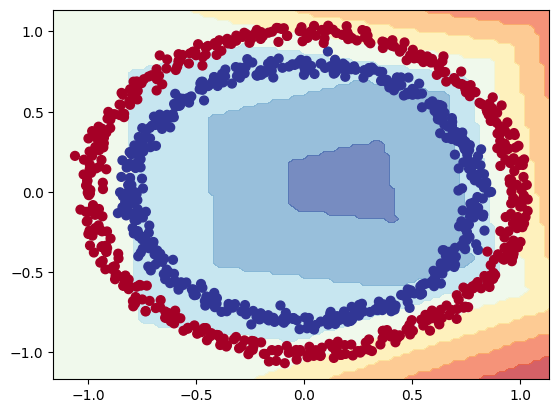

In [31]:
# How do our model predictions look
plot_decision_boundary(model_6, X, y)

In [33]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_7.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 6ms/step - loss: 0.6903 - accuracy: 0.5030
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6899 - accuracy: 0.5070
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5070
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5110
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5120
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5160
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5240
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5240
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5250
Epoch 10/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5280
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


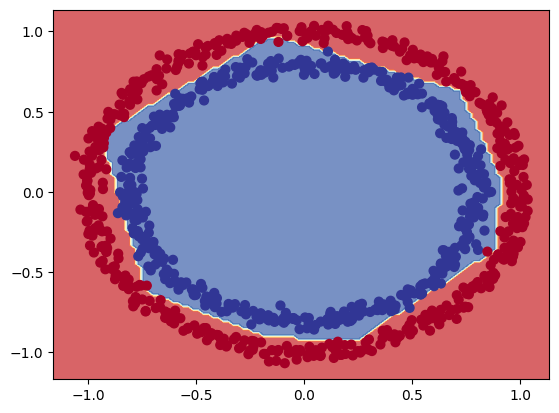

In [34]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**Question:** What's wrong the predictions we have made? Are we really evaluating our model correctly?

**Note:** The combination of **linear (straight line) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.